# Churn Prediction using Random Forest Classifier
## -  Had previously tried other models, but found Random Forest to work best for this particular problem and dataset
## - Will be appending other models for comparitive study

### Dataset is the from: 
https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv

In [1]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('E:\\Marketing Intelligence\\Churn_new.csv')  #make dataframe
display(df.head(5))
df.dtypes

,churn_decision,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,NoInternet,FiberOpticInternet,...,TechSupport,StreamingTV,StreamingMovies,MonthlyContract,Oneyearcontract,Twoyearcontract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,1,Electronic check,29.85,29.85
1,0,1,0,0,0,34,1,0,0,0,...,0,0,0,0,1,0,0,Mailed check,56.95,1889.50
2,1,1,0,0,0,2,1,0,0,0,...,0,0,0,1,0,0,1,Mailed check,53.85,108.15
3,0,1,0,0,0,45,0,0,0,0,...,1,0,0,0,1,0,0,Bank transfer (automatic),42.30,1840.75
4,1,0,0,0,0,2,1,0,0,1,...,0,0,0,1,0,0,1,Electronic check,70.70,151.65


churn_decision          int64
gender                  int64
SeniorCitizen           int64
Partner                 int64
Dependents              int64
tenure                  int64
PhoneService            int64
MultipleLines           int64
NoInternet              int64
FiberOpticInternet      int64
DSLInternet             int64
OnlineSecurity          int64
OnlineBackup            int64
DeviceProtection        int64
TechSupport             int64
StreamingTV             int64
StreamingMovies         int64
MonthlyContract         int64
Oneyearcontract         int64
Twoyearcontract         int64
PaperlessBilling        int64
PaymentMethod          object
MonthlyCharges        float64
TotalCharges          float64
dtype: object

# Data Exploration

In [3]:
#view distribution of fields
print("Number of fields: ", df.shape[0])
counts = df.describe().iloc[0]

temp=pd.DataFrame(counts.tolist(), columns=["number of records"], index=counts.index.values)
display(temp.transpose())

Number of fields:  7032


,churn_decision,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,NoInternet,FiberOpticInternet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyContract,Oneyearcontract,Twoyearcontract,PaperlessBilling,MonthlyCharges,TotalCharges
number of records,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,...,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0,7032.0


## Feature Engineering

In [4]:
df = df.drop(["PaymentMethod"], axis=1)
features = df.drop(["churn_decision"], axis=1).columns

#Normalize the large income data for HourlyRate, DailyRate, MonthlyRate and MonthlyIncome
norm_col = ['MonthlyCharges','TotalCharges']
for col in norm_col:
    df[col] = (df[col] - df[col].mean())/ df[col].std()

"""#Feature Engineering
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()
#removing nulls
#obj_df[obj_df.isnull().any(axis=1)]

df = df.drop(["PaymentMethod"], axis=1)
#considering feature to be predicted
features = df.drop(["churn_decision"], axis=1).columns

display(df)
can also be written as 
drop_columns = ['PaymentMethod']
data = data.drop(drop_columns, axis=1)

#features = data.drop(["churn_decision"]).columns   #column to be considered as feature to be predicted"""

'#Feature Engineering\nobj_df = df.select_dtypes(include=[\'object\']).copy()\nobj_df.head()\n#removing nulls\n#obj_df[obj_df.isnull().any(axis=1)]\n\ndf = df.drop(["PaymentMethod"], axis=1)\n#considering feature to be predicted\nfeatures = df.drop(["churn_decision"], axis=1).columns\n\ndisplay(df)\ncan also be written as \ndrop_columns = [\'PaymentMethod\']\ndata = data.drop(drop_columns, axis=1)\n\n#features = data.drop(["churn_decision"]).columns   #column to be considered as feature to be predicted'

In [5]:
df_train, df_test = train_test_split(df, test_size=0.20)
display(df)

,churn_decision,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,NoInternet,FiberOpticInternet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyContract,Oneyearcontract,Twoyearcontract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,-1.161611,-0.994123
1,0,1,0,0,0,34,1,0,0,0,...,1,0,0,0,0,1,0,0,-0.260859,-0.173727
2,1,1,0,0,0,2,1,0,0,0,...,0,0,0,0,1,0,0,1,-0.363897,-0.959581
3,0,1,0,0,0,45,0,0,0,0,...,1,1,0,0,0,1,0,0,-0.747797,-0.195234
4,1,0,0,0,0,2,1,0,0,1,...,0,0,0,0,1,0,0,1,0.196164,-0.940391
5,1,0,0,0,0,8,1,1,0,1,...,1,0,1,1,1,0,0,1,1.158407,-0.645323
6,0,1,0,0,1,22,1,1,0,1,...,0,0,1,0,1,0,0,1,0.807745,-0.147302
7,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,1,0,0,0,-1.164935,-0.874107
8,1,0,0,1,0,28,1,1,0,1,...,1,1,1,1,1,0,0,1,1.329583,0.336492
9,0,1,0,0,1,62,1,0,0,0,...,0,0,0,0,0,1,0,0,-0.287450,0.531438


## Setting up RandomForestClassifier instance and fit to data

In [6]:

clf = RandomForestClassifier(n_estimators=1000, random_state=0, max_features=.1, max_depth=15)
clf.fit(df_train[features], df_train["churn_decision"])

# Make predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
score = clf.score(df_test[features], df_test["churn_decision"])
print("Accuracy: ", score)

Accuracy:  0.796730632552


,Predicted False,Predicted True
Actual False,919,109
Actual True,177,202


Accuracy:  0.796730632552


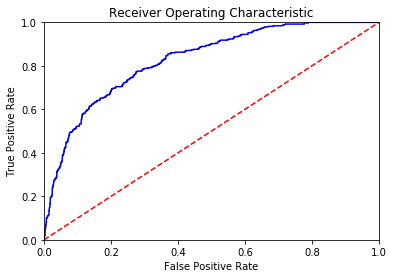

In [8]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["churn_decision"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["churn_decision"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print("Accuracy: ", score)
plt.show()

,importance,labels
21,0.188152,TotalCharges
20,0.174932,MonthlyCharges
4,0.169332,tenure
16,0.059330,MonthlyContract
8,0.037793,FiberOpticInternet


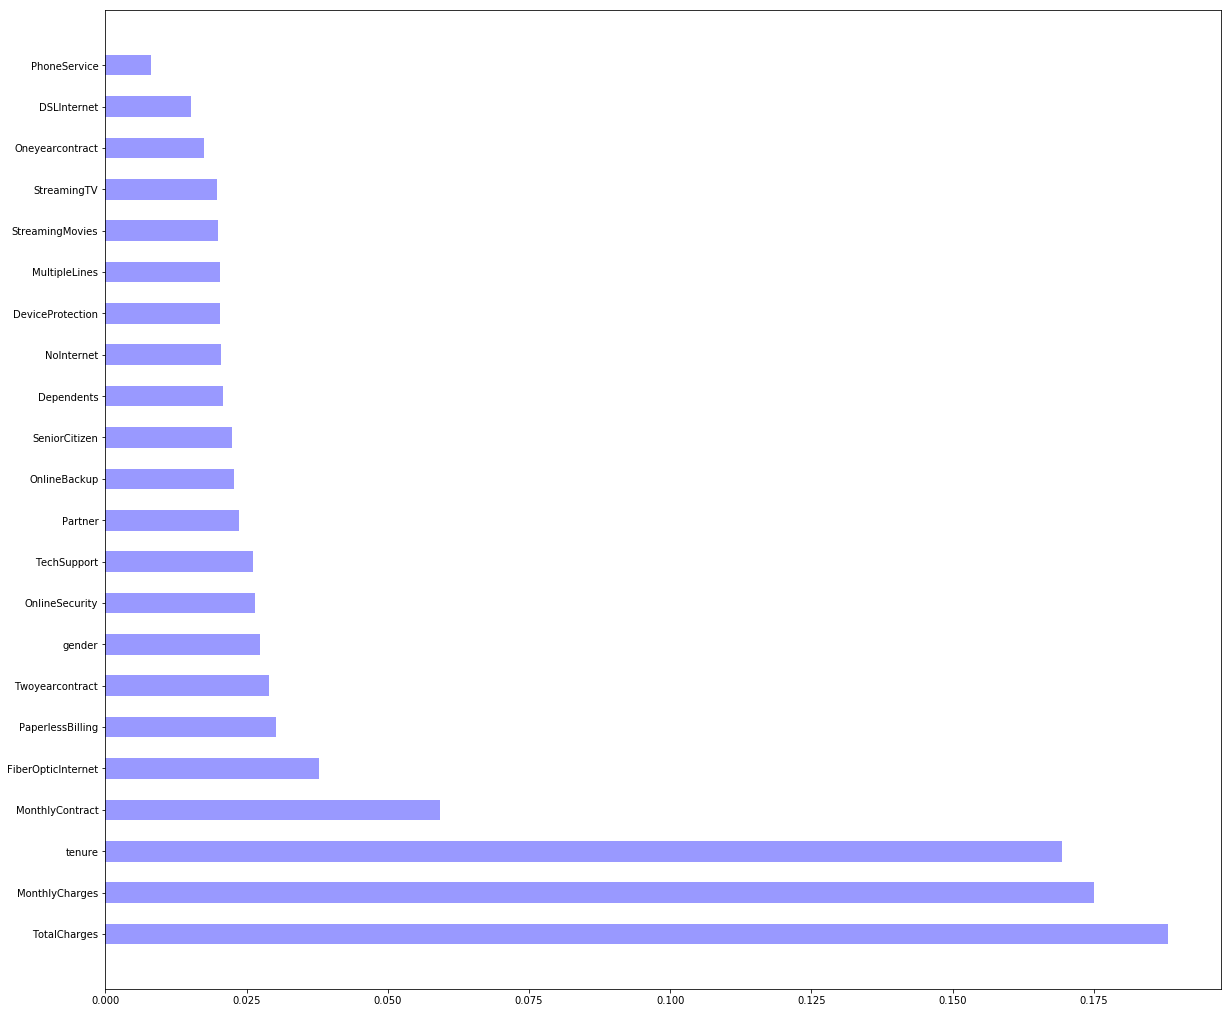

In [9]:
import numpy as np
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

In [10]:
df_test["prob_true"] = probs[:, 1]
df_risky = df_test[df_test["prob_true"] > 0.9]
display(df_risky.head(5)[["prob_true"]])

E:\Other\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
3932,0.918090
1144,0.916484
6614,0.959685
3319,0.924580
2792,0.916401


In [11]:
display(df)
display(clf)

,churn_decision,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,NoInternet,FiberOpticInternet,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MonthlyContract,Oneyearcontract,Twoyearcontract,PaperlessBilling,MonthlyCharges,TotalCharges
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,-1.161611,-0.994123
1,0,1,0,0,0,34,1,0,0,0,...,1,0,0,0,0,1,0,0,-0.260859,-0.173727
2,1,1,0,0,0,2,1,0,0,0,...,0,0,0,0,1,0,0,1,-0.363897,-0.959581
3,0,1,0,0,0,45,0,0,0,0,...,1,1,0,0,0,1,0,0,-0.747797,-0.195234
4,1,0,0,0,0,2,1,0,0,1,...,0,0,0,0,1,0,0,1,0.196164,-0.940391
5,1,0,0,0,0,8,1,1,0,1,...,1,0,1,1,1,0,0,1,1.158407,-0.645323
6,0,1,0,0,1,22,1,1,0,1,...,0,0,1,0,1,0,0,1,0.807745,-0.147302
7,0,0,0,0,0,10,0,0,0,0,...,0,0,0,0,1,0,0,0,-1.164935,-0.874107
8,1,0,0,1,0,28,1,1,0,1,...,1,1,1,1,1,0,0,1,1.329583,0.336492
9,0,1,0,0,1,62,1,0,0,0,...,0,0,0,0,0,1,0,0,-0.287450,0.531438


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=0.1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [12]:
from sklearn import metrics
result = {
    'Model': clf.__class__.__name__,
    'Confusion_Matrix': metrics.confusion_matrix(df_test["churn_decision"], predictions),
    'Classification_Report': metrics.classification_report(df_test["churn_decision"], predictions),
    'Precision Score': metrics.precision_score(df_test["churn_decision"], predictions),
    'Recall Score': metrics.recall_score(df_test["churn_decision"], predictions),
    'F1 Score': metrics.f1_score(df_test["churn_decision"], predictions)
    }

## Writing Predictions to File

In [13]:
import csv 
w = csv.writer(open("C:\\Users\\Sanjay\\Desktop\\RFC.csv", "w"))
for key, val in result.items():
    w.writerow([key, val])
    #f.close()

In [14]:
import pydotplus
import six
import graphviz
from sklearn import tree
dotfile = six.StringIO()
i_tree = 0
for tree_in_forest in clf.estimators_:
    if (i_tree <1):        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.4923 to fit

